# 1. CONSIDERAÇÕES INICIAIS

Script para elaboração do TCC, conclusão do MBA em data science e analytics

# 2. BIBLIOTECAS BÁSICAS



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_auc_score, roc_curve

# 3. DATASET

In [ ]:
#criação da base de dados
dataset = pd.read_csv('/content/creditcard.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# 4. ANÁLISE EXPLORATÓRIA DE DADOS

In [ ]:
# visualização das primeiras abservações
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#visualização das últimas observações
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# tamanho da base
dataset.shape

(284807, 31)

In [ ]:
#verificação de valores nulos e o tipo de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Observa-se que há 30 variavéis explicativas, sendo que, por questão de confiabilidade, 28 variáveis são variáveis númericas oriundas da aplicação de PCA. Apenas as variáveis tempo e montante foram disponibilizadas. A variável resposta é a 'Class', do tipo binária, na qual 0 corresponde a transações não fraudulentas, e 1 corresponde a transações fraudulentas.

In [ ]:
# verificação de missing values
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há missing values na base de dados

In [ ]:
#verificar se tem valores nulos
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Não há valores nulos

Total de transações:  284807
Transações não fraudulentas:  284315
% de Transações não fraudulentas:  99.827 %
Transações fraudulentas:  492
% de Transações fraudulentas:  0.173 %
Distribuição: 
0    284315
1       492
Name: Class, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


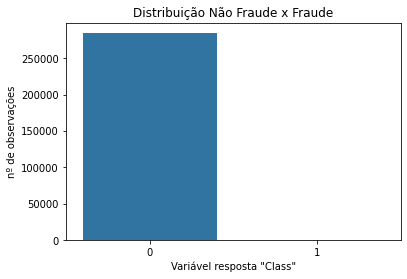

In [ ]:
# contagem e visualização da variável resposta
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
distribuicao = dataset['Class'].value_counts()
total = len(dataset)
fraudes =  dataset['Class'].sum()
validas = total - fraudes
per_validas = validas / total
per_fraudes = fraudes /total
print("Total de transações: ", total)
print("Transações não fraudulentas: ", validas)
print("% de Transações não fraudulentas: ", "%.3f" %(per_validas*100),"%")
print("Transações fraudulentas: ", fraudes)
print("% de Transações fraudulentas: ", "%.3f" %(per_fraudes*100),"%")
print("Distribuição: ")
print (distribuicao)
ax = sns.countplot(dataset['Class']).set(title='Distribuição Não Fraude x Fraude')
plt.ylabel('nº de observações')
plt.xlabel('Variável resposta "Class"')
plt.show()


Como é de se esperar, as transações fraudulentas são minoria, 492 do total de 284807 observações, correspondendo a 0,17% das observações.
Portanto, para a construção do nosso modelo preditivo, previamente, será necessário a realização do balanceamento dos dados.

In [ ]:
#estatísticas descritivas da variável resposta
#descrição dos dados das transações não fraudulentas
dataset_não_fraudulentas = dataset.Amount[dataset.Class == 0]
dataset_não_fraudulentas.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#descrição dos dados das transações fraudulentas
dataset_fraudulentas = dataset.Amount[dataset.Class == 1]
dataset_fraudulentas.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Observa-se que as transações fraudulentas possuem uma média maior do que as 
transações não fraudulentas (105.89 contra 77.05), sendo que 75% das observações vão até o valor de 105.89, enquanto nas transções não fraudulentas vão até 77.05. Entretanto, o valor máximo é menor: 2125.87 ante 25691.16

#5. SEPARANDO A BASE DE TREINO E TESTE


In [ ]:
#separando os dados para treinamento e teste
X = dataset.drop(["Class"], axis=1)
y = dataset['Class']

In [ ]:
#split de treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=13)
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)
print(y_treino.value_counts())
print(y_teste.value_counts())

(199364, 30) (85443, 30) (199364,) (85443,)
0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64


# 6. DADOS DESBALANCEADOS

# 6.1 ÁRVORE DE DECISÃO

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo =DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino, y_treino)

In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.024190606550221212

In [ ]:
#profundidade da árvore default
print(modelo.get_depth())

22


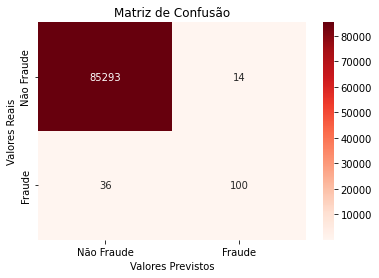

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9994148145547324


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.74      0.80       136

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



0.867565002251384


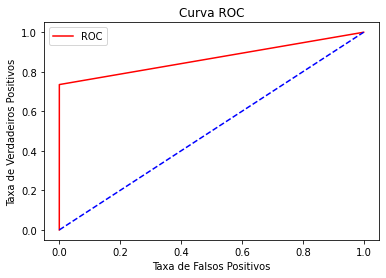

In [ ]:
#CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 6.2 RANDON FOREST

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino, y_treino)

CPU times: user 52min 25s, sys: 194 ms, total: 52min 25s
Wall time: 1min 20s


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.02023931351818346

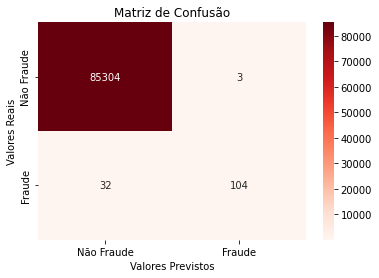

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9995903701883126


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.97      0.76      0.86       136

    accuracy                           1.00     85443
   macro avg       0.99      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.8823353576252966


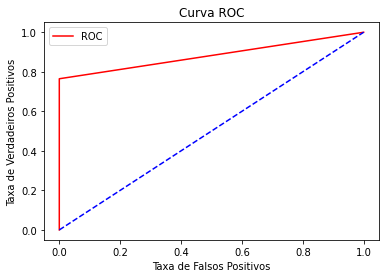

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 7 MÉTODOS DE OVER-SAMPLING

# 7.1 SMOTE


In [ ]:
#balanceamento da base de treino
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
print(y_treino.value_counts()) # verificação do X_treino antes do SMOTE
print(y_teste.value_counts()) # verificação do y_teste
bal = SMOTE(random_state=13, n_jobs=-1, k_neighbors=2)
X_treino_bal, y_treino_bal = bal.fit_resample(X_treino, y_treino)
print(y_treino_bal.value_counts())#treino após o SMOTE

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
0    199008
1    199008
Name: Class, dtype: int64


# 7.1.1 -SMOTE -ÁRVORE DE DECISÃO

In [ ]:
#modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino_bal, y_treino_bal)
print(modelo.get_depth())

45


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.03945368530836923

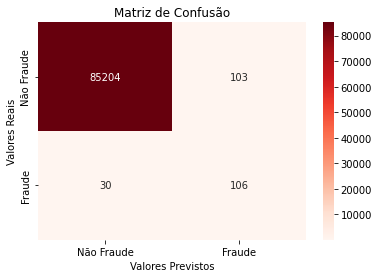

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9984434067155882


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.51      0.78      0.61       136

    accuracy                           1.00     85443
   macro avg       0.75      0.89      0.81     85443
weighted avg       1.00      1.00      1.00     85443



0.8891021804293006


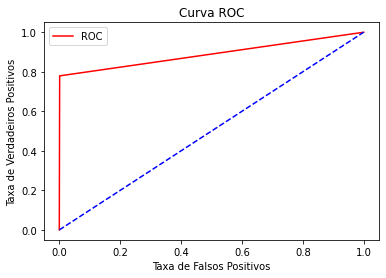

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 7.1.2 - SMOTE - RANDOM FOREST

In [ ]:
#modelo
%%time
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino_bal, y_treino_bal)

CPU times: user 1h 35min 36s, sys: 256 ms, total: 1h 35min 36s
Wall time: 2min 26s


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.0199480851908641

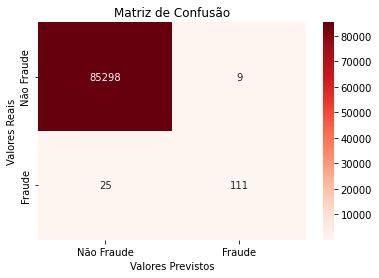

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.999602073897218


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9080354846405957


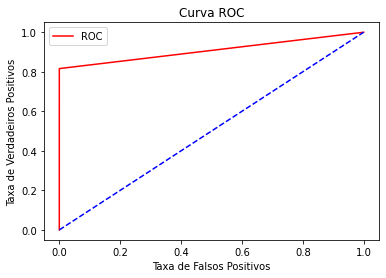

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 7.2 ADASYN

In [ ]:
#balanceamento da base de treinofrom imblearn.over_sampling import ADASYN
from sklearn.utils import resample
from sklearn.datasets import make_classification
print(y_treino.value_counts()) # verificação do X_treino antes antes da técnica
print(y_teste.value_counts()) # verificação do y_teste
bal = ADASYN(random_state=13, n_jobs=-1, n_neighbors=2)
X_treino_bal, y_treino_bal = bal.fit_resample(X_treino, y_treino)
print(y_treino_bal.value_counts())#treino após a técnica

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
1    199065
0    199008
Name: Class, dtype: int64


# 7.2.1 ADASYN - ÁRVORE DE DECISÃO

In [ ]:
#modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino_bal, y_treino_bal)
print(modelo.get_depth())

38


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.040622936324872516

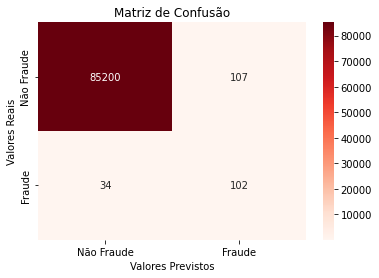

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9983497770443454


In [ ]:
#outras métricas

print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.49      0.75      0.59       136

    accuracy                           1.00     85443
   macro avg       0.74      0.87      0.80     85443
weighted avg       1.00      1.00      1.00     85443



0.8743728533414609


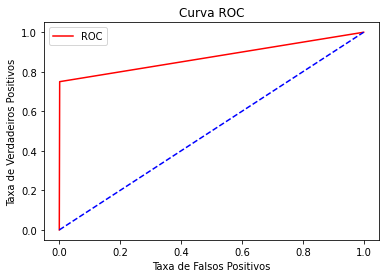

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 7.2.2 ADASYN - RANDOM FOREST

In [ ]:
#modelo
%%time
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino_bal, y_treino_bal)

CPU times: user 1h 27min 29s, sys: 209 ms, total: 1h 27min 29s
Wall time: 2min 13s


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.02023931351818346

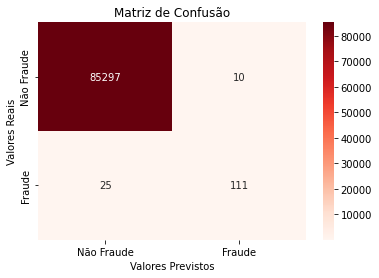

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9995903701883126


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.92      0.82      0.86       136

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.908029623456871


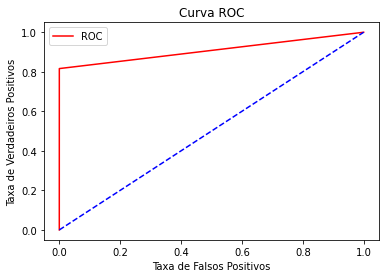

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 8.MÉTODOS DE UNDER-SAMPLING

# 8.1 RandomUnderSampler

In [ ]:
#balanceamento da base de treino
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
print(y_treino.value_counts()) # verificação do y_treino antes antes da técnica
print(y_teste.value_counts()) # verificação do y_teste
bal = RandomUnderSampler(random_state=13)
X_treino_bal, y_treino_bal = bal.fit_resample(X_treino, y_treino)
print(y_treino_bal.value_counts())#treino após a técnica

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
0    356
1    356
Name: Class, dtype: int64


# 8.1.1 RandomUnderSampler - ÁRVORE DE DECISÃO


In [ ]:
#modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino_bal, y_treino_bal)
print(modelo.get_depth())

9


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.3115427064658793

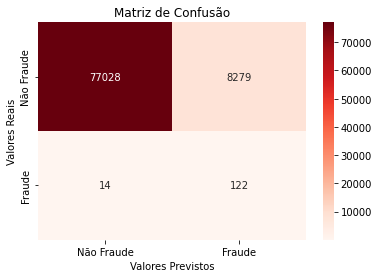

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.902941142047915


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.90      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.90      0.49     85443
weighted avg       1.00      0.90      0.95     85443



0.900004671708204


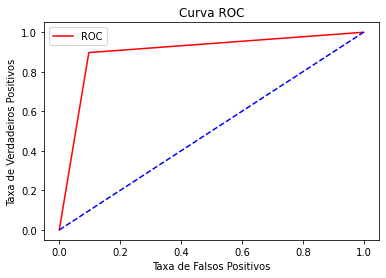

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 8.1.2 RandomUnderSampler - RANDOM FOREST

In [ ]:
#modelo
%%time
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino_bal, y_treino_bal)

CPU times: user 3.92 s, sys: 269 ms, total: 4.19 s
Wall time: 2.93 s


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.1549332338940783

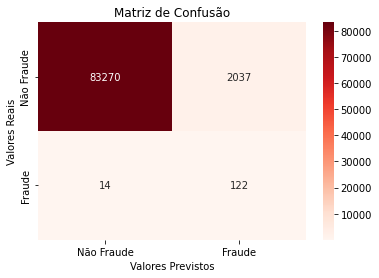

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9759956930351228


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.90      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



0.9365901805175632


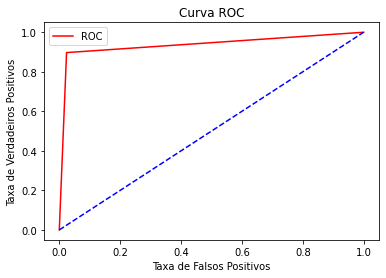

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

#8.2 EditedNearestNeighbours

In [ ]:
#balanceamento da base de treino
%%time
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.utils import resample
print(y_treino.value_counts()) # verificação do y_treino antes da técnica
print(y_teste.value_counts()) # verificação do y_teste
bal = EditedNearestNeighbours(n_jobs=-1, sampling_strategy='majority',kind_sel='mode')
X_treino_bal, y_treino_bal = bal.fit_resample(X_treino, y_treino)
print(y_treino_bal.value_counts())#treino após a técnica
print(y_teste.value_counts()) # verificação do y_teste

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
0    199002
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
CPU times: user 44min 57s, sys: 1h 41min 30s, total: 2h 26min 27s
Wall time: 21min 23s


# 8.2.1 EditedNearestNeighbours - ÁRVORE DE DECISÃO

In [ ]:
#modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino, y_treino)
print(modelo.get_depth())

22


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.02736854709228341

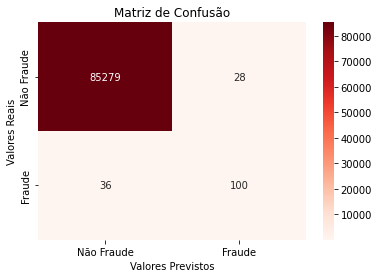

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9992509626300574


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.74      0.76       136

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



0.8674829456792389


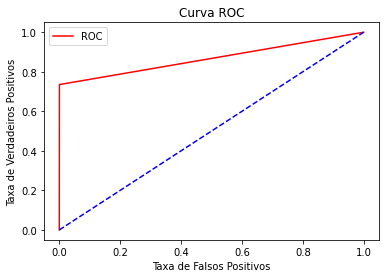

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 8.2.2 EditedNearestNeighbours - RANDOM FOREST

In [ ]:
#modelo
%%time
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino_bal, y_treino_bal)

CPU times: user 52min 3s, sys: 165 ms, total: 52min 3s
Wall time: 1min 20s


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.0199480851908641

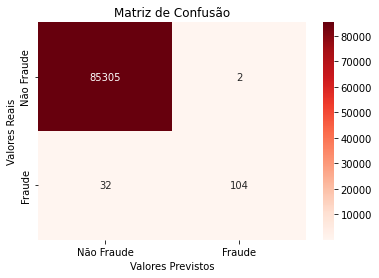

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.999602073897218


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.98      0.76      0.86       136

    accuracy                           1.00     85443
   macro avg       0.99      0.88      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.8823412188090213


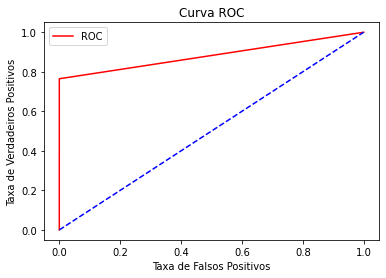

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 8.3 TomekLinks

In [ ]:
#balanceamento da base de treino
%%time
from imblearn.under_sampling import TomekLinks
from sklearn.utils import resample
print(y_treino.value_counts()) # verificação do X_treino antes da técnica
print(y_teste.value_counts()) # verificação do y_teste
bal = TomekLinks(n_jobs=-1)
X_treino_bal, y_treino_bal = bal.fit_resample(X_treino, y_treino)
print(y_treino_bal.value_counts())#treino após a técnica

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
0    198949
1       356
Name: Class, dtype: int64
CPU times: user 39min 18s, sys: 1h 42min 4s, total: 2h 21min 23s
Wall time: 15min 48s


# 8.3.1 TomekLinks - ÁRVORE DE DECISÃO

In [ ]:
#modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino_bal, y_treino_bal)
print(modelo.get_depth())

22


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada
np.sqrt(mean_squared_error(y_teste, y_pred))

0.02736854709228341

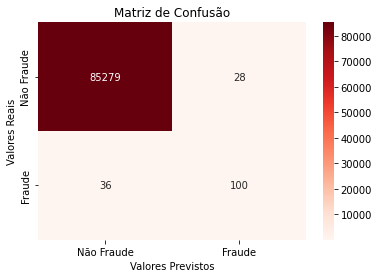

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9992509626300574


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.74      0.76       136

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



0.8674829456792389


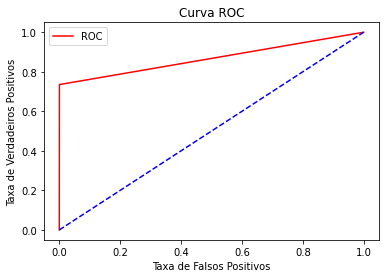

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 8.3.2 TomekLinks - RANDOM FOREST

In [ ]:
#modelo
%%time
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino_bal, y_treino_bal)

CPU times: user 51min 37s, sys: 139 ms, total: 51min 37s
Wall time: 1min 19s


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada
np.sqrt(mean_squared_error(y_teste, y_pred))

0.02080954659520548

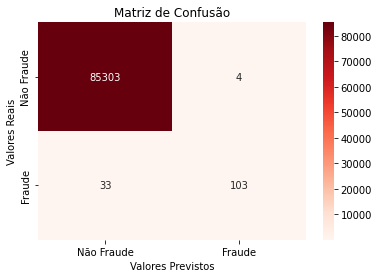

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9995669627705019


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.96      0.76      0.85       136

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



0.8786530258533366


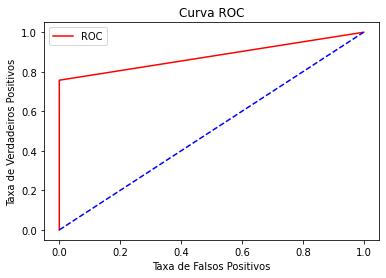

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 9. COMBINAÇÃO DE MÉTODOS OVER E UNDER-SAMPLING

# 9.1  SMOTEENN

In [ ]:
#balanceamento da base de treino
%%time
from sklearn.datasets import make_classification
from imblearn.combine import SMOTEENN

print(y_treino.value_counts()) # verificação do X_treino antes da técnica
print(y_teste.value_counts()) # verificação do y_teste
bal = SMOTEENN(random_state=13, n_jobs=-1)
X_treino_bal, y_treino_bal = bal.fit_resample(X_treino, y_treino)
print(y_treino_bal.value_counts())#treino após a técnica

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
1    190114
0    181651
Name: Class, dtype: int64
CPU times: user 3h 10min 36s, sys: 6h 35min 56s, total: 9h 46min 33s
Wall time: 1h 35min


#9.1.1 - SMOTEENN - ÁRVORE DE DECISÃO

In [ ]:
#modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino_bal, y_treino_bal)
print(modelo.get_depth())

35


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.045898448807812436

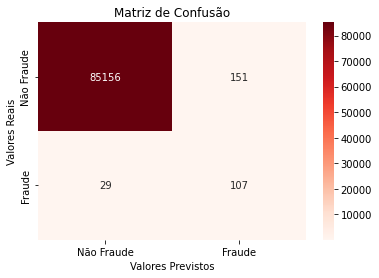

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9978933323970366


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.41      0.79      0.54       136

    accuracy                           1.00     85443
   macro avg       0.71      0.89      0.77     85443
weighted avg       1.00      1.00      1.00     85443



0.892497314198752


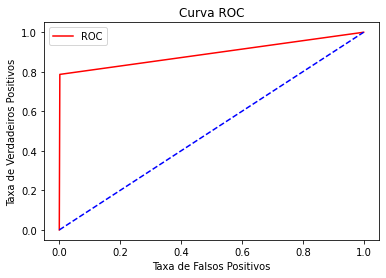

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 9.1.2 - SMOTEENN - RANDOM FOREST

In [ ]:
#modelo
%%time
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino_bal, y_treino_bal)

CPU times: user 1h 26min 37s, sys: 51.6 ms, total: 1h 26min 37s
Wall time: 2min 12s


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.022433445632139094

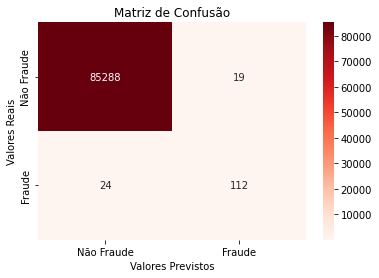

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9994967405170698


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.82      0.84       136

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



0.9116533433915842


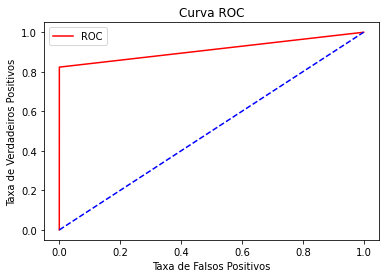

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 9.2 SMOTETomek

In [ ]:
#balanceamento da base de treino
%%time
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
print(y_treino.value_counts()) # verificação do X_treino antes da técnica
print(y_teste.value_counts()) # verificação do y_teste
bal = SMOTETomek(random_state=13)
X_treino_bal, y_treino_bal = bal.fit_resample(X_treino, y_treino)
print(y_treino_bal.value_counts())#treino após a técnica

0    199008
1       356
Name: Class, dtype: int64
0    85307
1      136
Name: Class, dtype: int64
0    198257
1    198257
Name: Class, dtype: int64
CPU times: user 1h 26min 33s, sys: 1h 24min 25s, total: 2h 50min 59s
Wall time: 27min 3s


# 9.2 SMOTETomek - ÁRVORE DE DECISÃO

In [ ]:
#modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo = DecisionTreeClassifier(random_state=13)
modelo = modelo.fit(X_treino_bal, y_treino_bal)
print(modelo.get_depth())

35


In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.04690732644487635

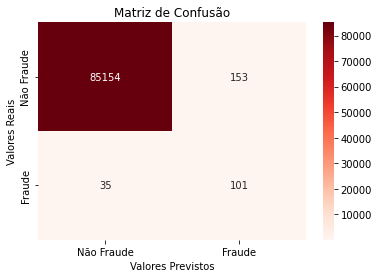

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9977997027257938


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.40      0.74      0.52       136

    accuracy                           1.00     85443
   macro avg       0.70      0.87      0.76     85443
weighted avg       1.00      1.00      1.00     85443



0.8704267683018909


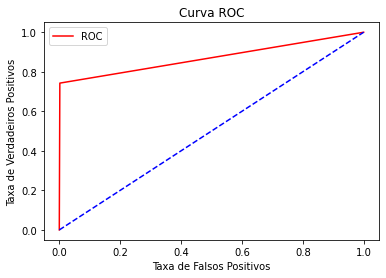

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)

# 9.2.2 SMOTETomek - RANDOM FOREST

In [ ]:
#modelo
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier(n_estimators=1000, random_state=13, n_jobs=-1)
modelo = modelo.fit(X_treino_bal, y_treino_bal)

In [ ]:
#predição
y_pred = modelo.predict(X_teste)

#erro médio - raíz quadrada

np.sqrt(mean_squared_error(y_teste, y_pred))

0.021088881867073465

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9995552590615966


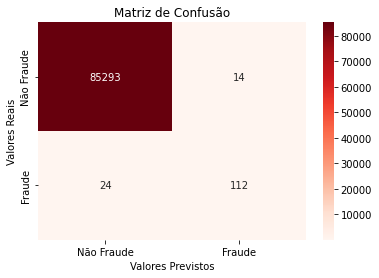

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cfm = confusion_matrix(y_teste, y_pred)
ax= plt.subplot()
sns.heatmap(cfm, cmap="Reds", annot=True, fmt='g', ax=ax);
ax.xaxis.set_ticklabels(['Não Fraude', 'Fraude']); ax.yaxis.set_ticklabels(['Não Fraude', 'Fraude'])
plt.title('Matriz de Confusão')
plt.xlabel('Valores Previstos')
plt.ylabel ('Valores Reais') 
plt.show()

In [ ]:
#acurácia
print(accuracy_score(y_teste, y_pred))

0.9995552590615966


In [ ]:
#outras métricas
print('Classification metrics: \n', classification_report(y_teste, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.89      0.82      0.85       136

    accuracy                           1.00     85443
   macro avg       0.94      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9116826493102076


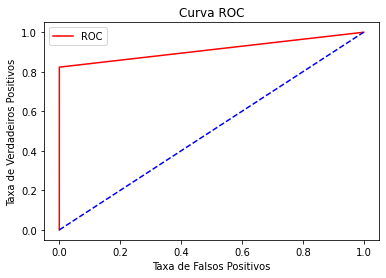

In [ ]:
# CURVA ROC
print(roc_auc_score(y_teste, y_pred))
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

fper, tper, thresholds = roc_curve(y_teste, y_pred)
plot_roc_curve(fper, tper)
